<a href="https://colab.research.google.com/github/Sajidshaik901/IMDB-Data-Visualization/blob/main/major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Hotel Bookings Data Analysis***

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Cleaner **style**

In [16]:
plt.style.use("ggplot")

# 1. Load & Clean **Data** *italicized text*

In [17]:
df = pd.read_csv("Hotel Bookings.csv")

Standardize column **names**

In [18]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

Handle missing values

In [19]:
df["children"] = df["children"].fillna(0)
df["babies"] = df["babies"].fillna(0)

Drop duplicates & invalid ADR

In [20]:
df = df.drop_duplicates()
df = df[df["adr"] >= 0]


New features

In [21]:
df["total_stay_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["party_size"] = df["adults"] + df["children"] + df["babies"]

month_map = {
    "january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
    "july":7,"august":8,"september":9,"october":10,"november":11,"december":12
}
df["arrival_date_month_num"] = df["arrival_date_month"].str.lower().map(month_map)

print("✅ Data ready for analysis\n")
print(df.head())

✅ Data ready for analysis

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1      

# ***2. When are bookings made?***

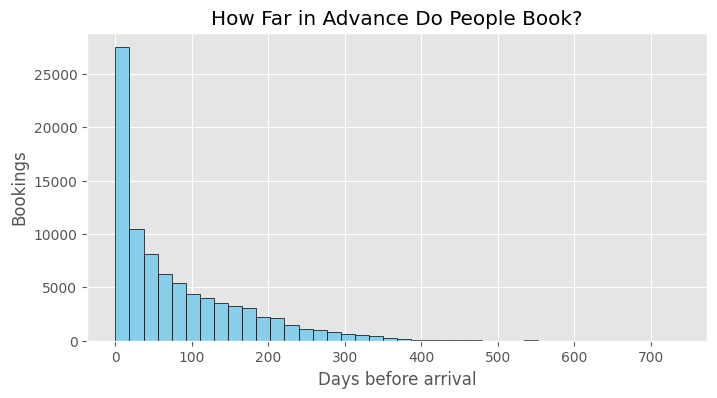

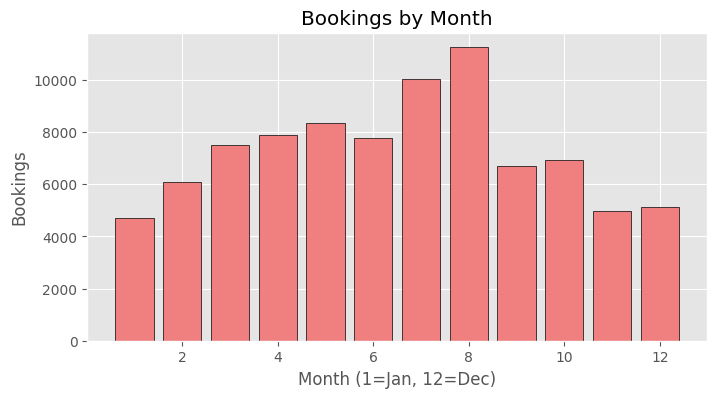

In [22]:
plt.figure(figsize=(8,4))
plt.hist(df["lead_time"], bins=40, color="skyblue", edgecolor="black")
plt.title("How Far in Advance Do People Book?")
plt.xlabel("Days before arrival")
plt.ylabel("Bookings")
plt.show()

monthly = df["arrival_date_month_num"].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(monthly.index, monthly.values, color="lightcoral", edgecolor="black")
plt.title("Bookings by Month")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Bookings")
plt.show()

# ***3. Length of Stay vs ADR***

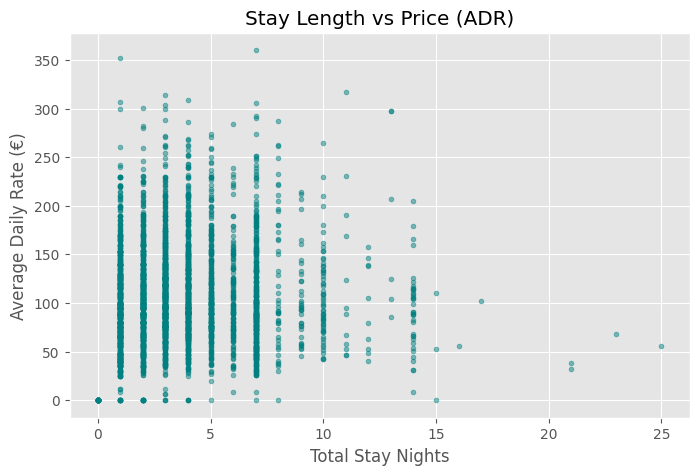

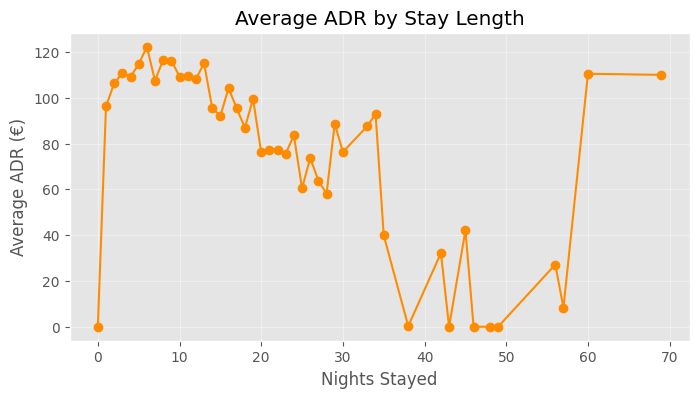

In [23]:
sample = df[["total_stay_nights","adr"]].sample(4000, random_state=1)
plt.figure(figsize=(8,5))
plt.scatter(sample["total_stay_nights"], sample["adr"], alpha=0.5, s=12, c="teal")
plt.title("Stay Length vs Price (ADR)")
plt.xlabel("Total Stay Nights")
plt.ylabel("Average Daily Rate (€)")
plt.show()

avg_adr = df.groupby("total_stay_nights")["adr"].mean()
plt.figure(figsize=(8,4))
plt.plot(avg_adr.index, avg_adr.values, marker="o", color="darkorange")
plt.title("Average ADR by Stay Length")
plt.xlabel("Nights Stayed")
plt.ylabel("Average ADR (€)")
plt.grid(alpha=0.4)
plt.show()

# ***4. Special Requests***

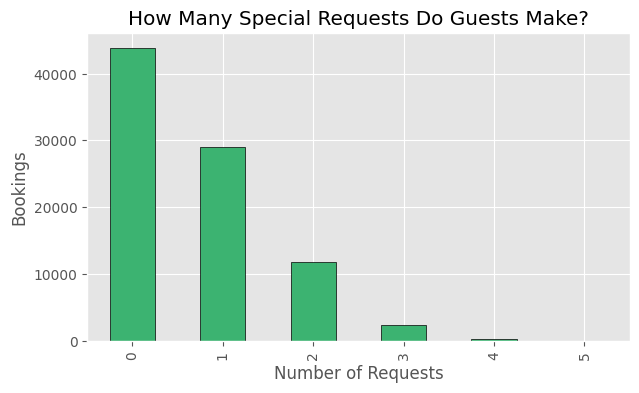

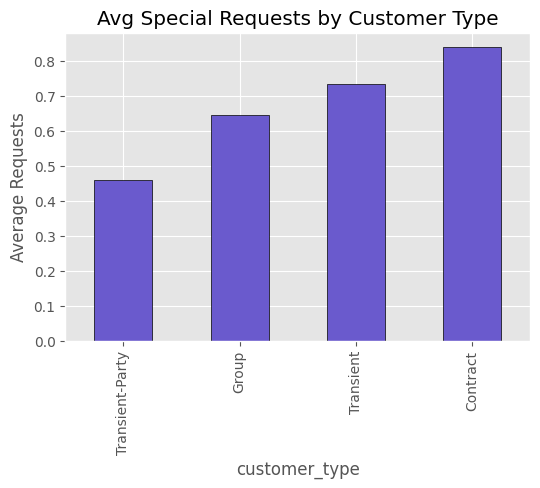

In [24]:
plt.figure(figsize=(7,4))
df["total_of_special_requests"].value_counts().sort_index().plot(
    kind="bar", color="mediumseagreen", edgecolor="black"
)
plt.title("How Many Special Requests Do Guests Make?")
plt.xlabel("Number of Requests")
plt.ylabel("Bookings")
plt.show()

if "customer_type" in df.columns:
    reqs = df.groupby("customer_type")["total_of_special_requests"].mean().sort_values()
    reqs.plot(kind="bar", figsize=(6,4), color="slateblue", edgecolor="black")
    plt.title("Avg Special Requests by Customer Type")
    plt.ylabel("Average Requests")
    plt.show()

# ***5. Segments & Cancellations***

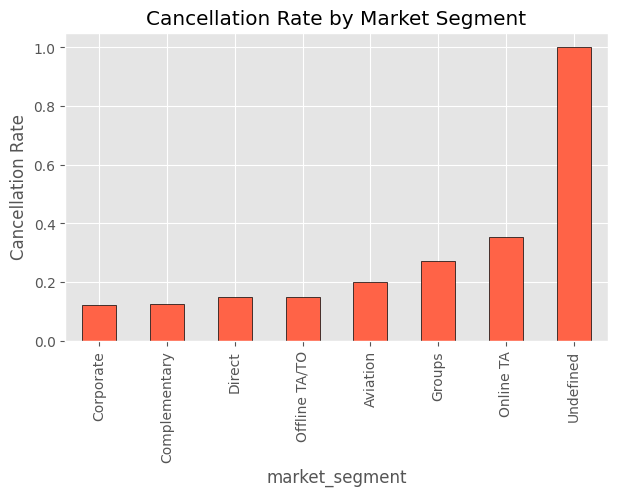

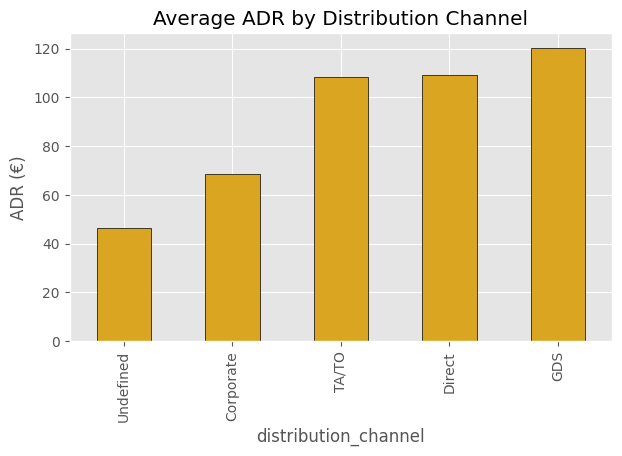

In [25]:
if "market_segment" in df.columns:
    cancel_rate = df.groupby("market_segment")["is_canceled"].mean().sort_values()
    cancel_rate.plot(kind="bar", figsize=(7,4), color="tomato", edgecolor="black")
    plt.title("Cancellation Rate by Market Segment")
    plt.ylabel("Cancellation Rate")
    plt.show()

if "distribution_channel" in df.columns:
    avg_adr_channel = df.groupby("distribution_channel")["adr"].mean().sort_values()
    avg_adr_channel.plot(kind="bar", figsize=(7,4), color="goldenrod", edgecolor="black")
    plt.title("Average ADR by Distribution Channel")
    plt.ylabel("ADR (€)")
    plt.show()

# ***6. Quick Business Insights***

In [26]:
print("\n📊 Quick Insights:")

print(f"- Guests usually book ~{df['lead_time'].median():.0f} days in advance.")
print(f"- Cheapest stays are for {df.groupby('total_stay_nights')['adr'].mean().idxmin()} nights.")
print(f"- '{df.groupby('customer_type')['total_of_special_requests'].mean().idxmax()}' customers request the most extras.")
if "is_canceled" in df.columns:
    print(f"- Overall cancellation rate: {df['is_canceled'].mean():.1%}")


📊 Quick Insights:
- Guests usually book ~49 days in advance.
- Cheapest stays are for 0 nights.
- 'Contract' customers request the most extras.
- Overall cancellation rate: 27.5%
